In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("weight-height.csv");
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [33]:
df.shape

(10000, 3)

In [34]:
df["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

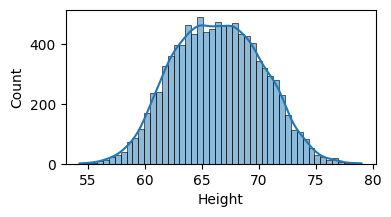

In [60]:
plt.figure(figsize=(4, 2))
sns.histplot(df["Height"], kde=True)

<Axes: xlabel='Height'>

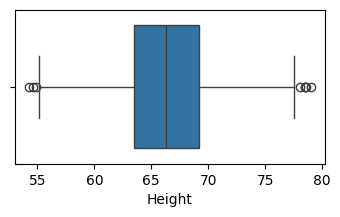

In [59]:
plt.figure(figsize=(4, 2))
sns.boxplot(data=df, x="Height")

### Deciding the threshold

In [36]:
upper_limit = df["Height"].quantile(0.99)
lower_limit = df["Height"].quantile(0.01)

print(upper_limit, lower_limit)

74.7857900583366 58.13441158671655


### Now Trimming

In [37]:
new_df_trimmed = df[(df["Height"] <= 74.78) & (df["Height"] >= 58.13)]
new_df_trimmed

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: xlabel='Height', ylabel='Count'>

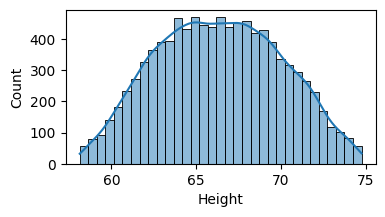

In [58]:
plt.figure(figsize=(4, 2))
sns.histplot(new_df_trimmed["Height"], kde=True)

<Axes: xlabel='Height'>

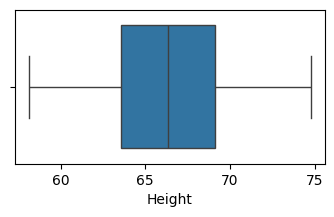

In [57]:
plt.figure(figsize=(4, 2))
sns.boxplot(data=new_df_trimmed, x="Height")

### Or you can do Capping (Winsorization)

In [39]:
new_df_capped = df.copy()

In [40]:
new_df_capped["Height"] = np.where(
    df["Height"] <= lower_limit,
    lower_limit,
    np.where(
        df["Height"] >= upper_limit,
        upper_limit,
        df["Height"]
    )
)

<Axes: xlabel='Height', ylabel='Count'>

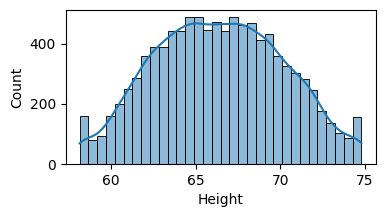

In [55]:
plt.figure(figsize=(4, 2))
sns.histplot(new_df_capped["Height"], kde=True)

<Axes: xlabel='Height'>

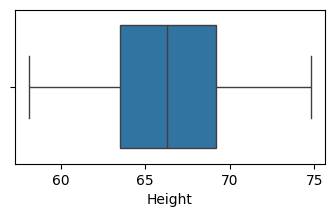

In [56]:
plt.figure(figsize=(4, 2))
sns.boxplot(data=new_df_capped, x="Height")